In [8]:
using JuMP, Ipopt, Printf, Plots
using  Images, QuartzImageIO, ImageView

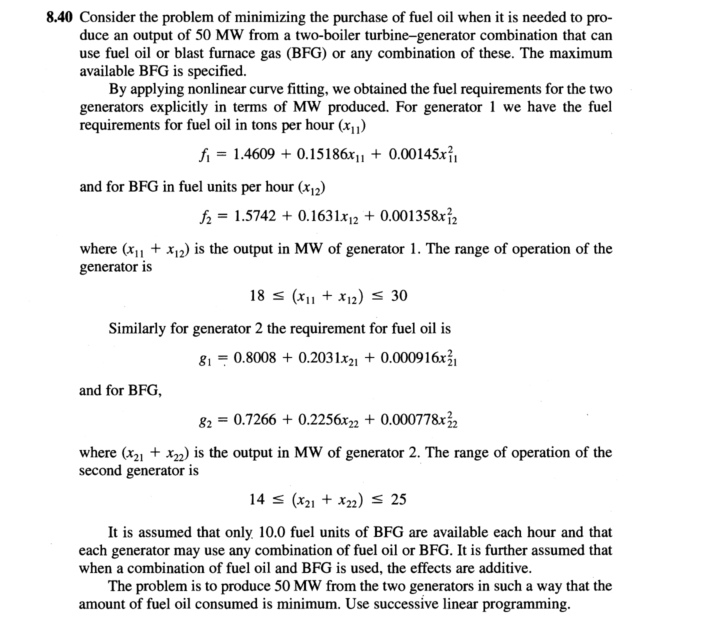

In [9]:
img = load("fig1_eh.png")

In [10]:
power_demand = 50;

fuel = Model(solver=IpoptSolver());

In [11]:
@variable(fuel, x11 >= 0, start=20);
@variable(fuel, x12 >= 0, start=20);
@variable(fuel, x21 >= 0, start=20);
@variable(fuel, x22 >= 0, start=20);
@variable(fuel, f1  >= 0, start= 5);
@variable(fuel, f2  >= 0, start= 5);
@variable(fuel, g1  >= 0, start= 5);
@variable(fuel, g2  >= 0, start= 5);

In [12]:
@NLconstraint(fuel, c1, f1 == 1.4609 + 0.15186*x11 + 0.00145 *x11^2 );
@NLconstraint(fuel, c2, f2 == 1.5742 + 0.1631 *x12 + 0.001358*x12^2 );
@NLconstraint(fuel, c3, g1 == 0.8008 + 0.2031 *x21 + 0.000916*x21^2 );
@NLconstraint(fuel, c4, g2 == 0.7266 + 0.2256 *x22 + 0.000778*x22^2 );


In [13]:
@NLconstraint(fuel, c5, 18 <= x11+x12 <= 30);
@NLconstraint(fuel, c6, 14 <= x21+x22 <= 25);


In [14]:
@NLconstraint(fuel, c7, x11+x12+x21+x22 == power_demand);


In [15]:
@NLobjective(fuel, Min, f1+f1);


In [16]:
status_fuel = solve(fuel);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       12
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        8
                     variables with only lower bounds:        8
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equ

In [19]:
println("Objective function value = ", getobjectivevalue(fuel))
@printf " f1     : %f\n" getvalue(f1)
@printf " g1     : %f\n" getvalue(g1)
@printf " f2     : %f\n" getvalue(f2)
@printf " g2     : %f\n" getvalue(g2)
@printf " x11    : %f\n" getvalue(x11)
@printf " x12    : %f\n" getvalue(x12)
@printf " x21    : %f\n" getvalue(x21)
@printf " x22    : %f\n" getvalue(x22)



Objective function value = 2.921799999468432
 f1     : 1.460900
 g1     : 3.248670
 f2     : 6.975765
 g2     : 3.425465
 x11    : 0.000000
 x12    : 27.033336
 x21    : 11.460196
 x22    : 11.506468
